In [1]:
#Helper packages

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import math
import missingno as msn

#Modelling packages

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#index_col = "Model"
epa_file = pd.DataFrame(pd.read_excel("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.xlsx"))
epa_file.to_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.csv", index = None, header = True)
epa = pd.read_csv("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.csv")
#epa.rename(columns=({'Veh Class':'Veh_Class'}))

<font size="10">Predicting and Analyzing Fuel Efficiency</font>
<br>
<br>
<font size="6">Description</font>


|  Feature | Description  |
|:---:|:---:|
|  Model |  Car brand. |
| Disp  |  Vehicle engine's volume. |
|  Cyl |  Vehicle cylinders. |
| Trans  | Transmission type.  |
|  Drive | The number of wheels which power the vehicle.  |
|  Fuel | The type of fuel which powers the car.  |
|  Veh_Class |  Vehicle classification type. |
|  Air Pollution Score | Scoring for vehicle emmissions.  |
|  City MPG |  Fuel consumption in the city in miles per gallon. |
|  Hwy MPG | Fuel consumption in the Highway in miles per gallon.  |
|  Cmb MPG |  Weighted combined average for city and highway MPG. |
| Greenhouse Gas Score  |  Scoring for vehicle greenhouse gas emissions. |
|  Smartway | Certification for fuel-efficient cars.   |
| Comb CO2  |  Volume of CO2 emissions. |

<br>

|  Number of Entries |  Number of Features |
|:---:|:---:|
| 26,871  |  15 |

In [ ]:
#Reference: Siyal, G. (2022, March 14). How to consolidate multiple Excel workbooks with python. MUO. Retrieved August 18, 2022, from https://www.makeuseof.com/consolidate-excel-workbooks-python/ 
input_file_path2 = "/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPA-Green_Vehicle-Guide/"
output_file_path2 = "/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/"
excel_file_list2 = os.listdir(input_file_path2)
#print(excel_file_list2)

df2 = pd.DataFrame()
for excel_files in excel_file_list2:
     if excel_files.endswith(".xlsx"):
        df3 = pd.read_excel(input_file_path2+excel_files)
        df2 = df2.append(df3)

df2.to_excel(output_file_path2+"EPAGreen.xlsx")

In [3]:
#index_col = "Model"
epa_file = pd.DataFrame(pd.read_excel("/home/emumen/Documents/Misk-DSI-2022/Predicting-and-Analyzing-Fuel-Efficiency/data/EPAGreen.xlsx"))

In [31]:
epa.head()

,Unnamed: 0,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,24,34,28,6,No,316
1,1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,24,34,28,6,No,316
2,2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No,333
3,3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No,333
4,4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No,387


In [70]:
epa.rename(columns = {"Comb CO2": "Comb_CO2"}, inplace = True)
#convert_dict = {"Comb CO2": float}
#epa = epa.astype("convert_dict")
#print(epa.dtypes)

In [80]:
a = 0
b = 0
Las = []
for ind in epa.index:
    if isinstance(epa['Comb_CO2'][ind], str) == True and "/" in epa['Comb_CO2'][ind]:
        a = epa['Comb_CO2'][ind][0:3]
        e = int(a)
        b = epa['Comb_CO2'][ind][4:]
        f = int(b)
        epa.Comb_CO2[epa.Comb_CO2 == epa['Comb_CO2'][ind]] = (e + f)/2
for ind in epa.index:
    if isinstance(epa['Comb_CO2'][ind], str) == True:
        Las.append(epa['Comb_CO2'][ind])
        print(Las)
#epa.info()

In [67]:
count = 0
count1 = 0
count2 = 0
count3 = 0
a = 0
b = 0
Lis = []
Lis1 = []
Lis2 = []
Lis3 = []
Lis_fin = []
#for ind in epa.index:
#    if "/" in epa['Comb CO2'][ind]:
#        epa[ind].drop()
for ind in epa.index:
    if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        Lis.append(epa['Comb CO2'][ind][0:3])
        Lis1.append(epa['Comb CO2'][ind][4:])
for i in Lis:
        update = int(i)
        Lis2.append(update)
for z in Lis1:
        update1 = int(z)
        Lis3.append(update1)
        #print(epa['Comb CO2'][ind])
         #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])
m = len(Lis2)
n = len(Lis3)
for fin in range(m):
        #print(Lis2[fin])
        a = Lis2[fin]
        for fin1 in range(n):
                if fin == fin1:
                        b = Lis3[fin1]
                        c = (a + b)/2
                        Lis_fin.append(c)
Lis1_fin = []
for y in Lis_fin:
        update2 = round(y)
        Lis1_fin.append(update2)

count_fin = 0
o = len(Lis1_fin)
for ind in epa.index:
        if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
                for z1 in range(o):
                        if z1 == ind:
                                epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], Lis1_fin[z1])


                
#for ind in epa.index:
#        if isinstance(epa['Comb CO2'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
#                print(epa['Comb CO2'][ind])

#for ind in epa.index:
#   int(epa['Comb CO2'][ind])

#for ind in epa.index:
#    if isinstance(epa['City MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count1 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#for ind in epa.index:
#    if isinstance(epa['Hwy MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count2 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#for ind in epa.index:
#    if isinstance(epa['Cmb MPG'][ind], str) == True and "/" in epa['Comb CO2'][ind]:
        #count3 += 1
        #epa['Comb CO2'][ind].replace(epa['Comb CO2'][ind], epa['Comb CO2'][ind][0:3])

#print(count)
#print(count1)
#print(count2)
#print(count3)
#print(Lis)
#print(Lis1)
#print(Lis2)
#print(Lis3)
#print(Lis_fin)
#print(len(Lis))
#print(Lis1_fin)
        #print(df['Name'][ind], df['Stream'][ind])

#epa = epa.astype({"Unnamed: 0"})

TypeError: replace() argument 2 must be str, not int

In [76]:
epa.describe()

,Unnamed: 0,Displ,Cyl
count,26871.000000,26054.000000,26054.000000
mean,1267.007592,3.160682,5.614647
std,753.992943,1.380859,1.859774
min,0.000000,0.600000,2.000000
25%,610.000000,2.000000,4.000000
50%,1247.000000,3.000000,6.000000
75%,1918.000000,3.700000,6.000000
max,2712.000000,8.400000,16.000000


In [12]:
epa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26871 entries, 0 to 26870
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            26871 non-null  int64  
 1   Model                 26871 non-null  object 
 2   Displ                 26054 non-null  float64
 3   Cyl                   26054 non-null  float64
 4   Trans                 26871 non-null  object 
 5   Drive                 26871 non-null  object 
 6   Fuel                  26871 non-null  object 
 7   Cert Region           19304 non-null  object 
 8   Stnd                  26871 non-null  object 
 9   Stnd Description      26871 non-null  object 
 10  Underhood ID          26871 non-null  object 
 11  Veh Class             26871 non-null  object 
 12  Air Pollution Score   26871 non-null  object 
 13  City MPG              26239 non-null  object 
 14  Hwy MPG               26239 non-null  object 
 15  Cmb MPG            

In [32]:
epa.head()

,Unnamed: 0,Model,Displ,Cyl,Trans,Drive,Fuel,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,24,34,28,6,No,316
1,1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,24,34,28,6,No,316
2,2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No,333
3,3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No,333
4,4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No,387


<AxesSubplot:>

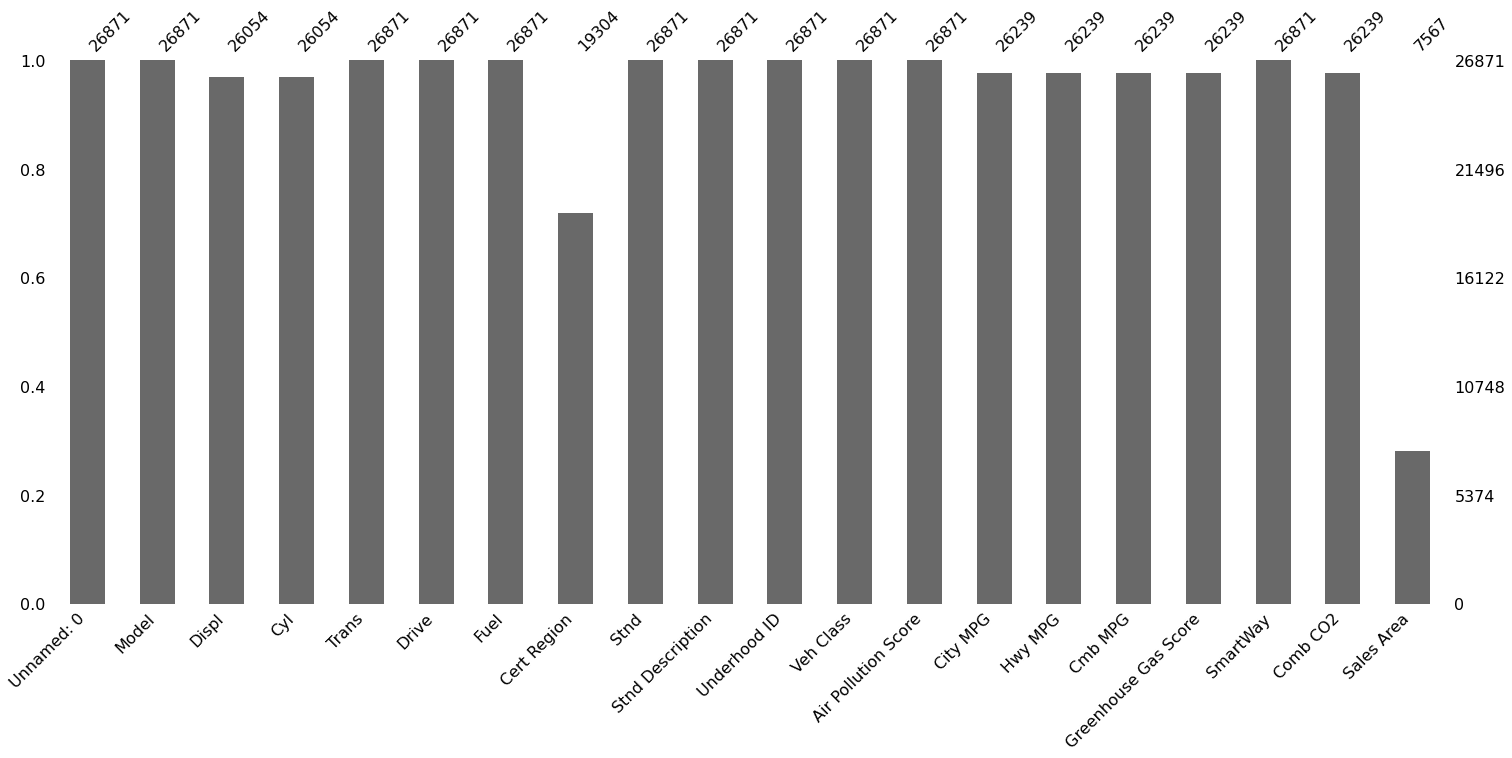

In [13]:
missing_epa = epa.isnull().sum()
#print(missing_epa)
msn.bar(epa)

<AxesSubplot:>

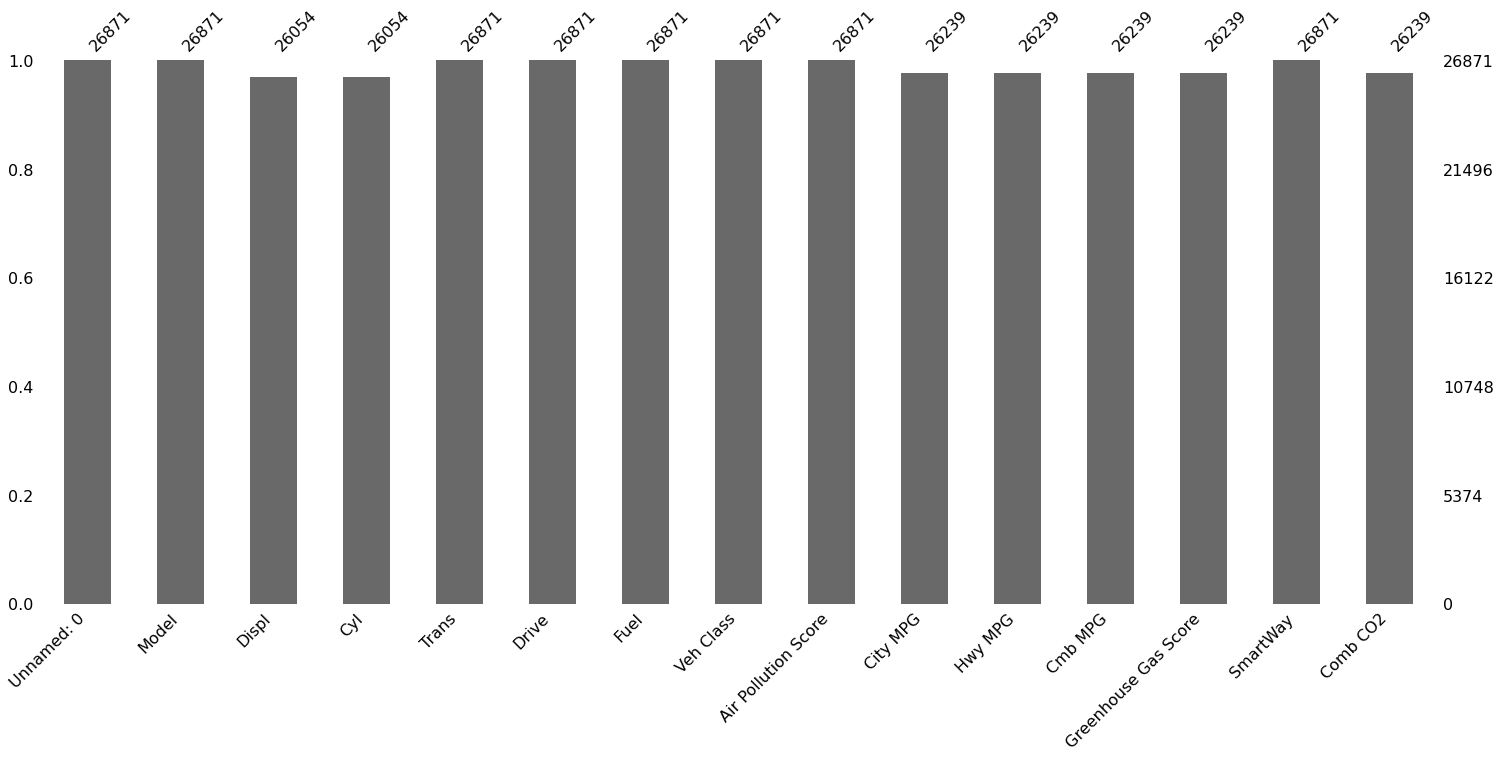

In [29]:
Columns = []
for column in epa:
    if epa[column].isna().sum() >= 0.6*26871:
#    if msn.bar(column) == 0:
        Columns.append(column)
    else:
        continue
epa.drop(Columns, axis = 1, inplace = True)
epa.drop(["Cert Region", "Stnd", "Stnd Description", "Underhood ID"], axis = 1, inplace = True)
epa.fillna(method ='pad')
#print(Columns)
msn.bar(epa)

<AxesSubplot:>

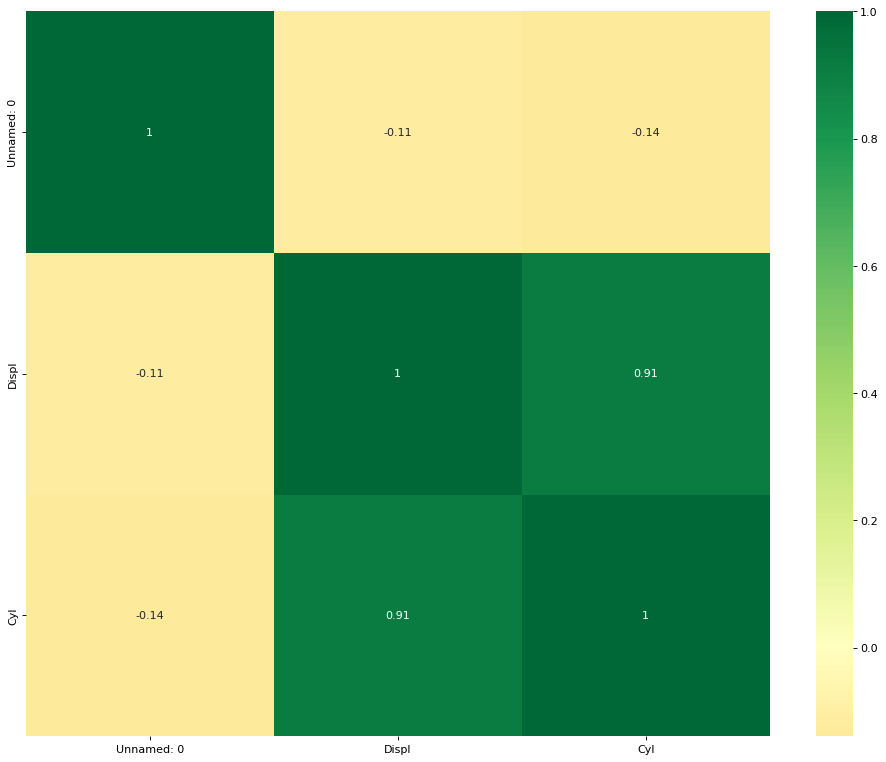

In [77]:
plt.figure(figsize=(15,12), dpi= 80)
sns.heatmap(epa.corr(), xticklabels=epa.corr().columns, yticklabels=epa.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [15]:
cyl_info = epa[["Cyl","City MPG"]]
cyl_info.groupby("Cyl").mean()

/tmp/ipykernel_2873/3323161536.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  cyl_info.groupby("Cyl").mean()


""
Cyl
2.0
3.0
4.0
5.0
6.0
8.0
10.0
12.0
16.0


In [16]:
two_Cyl = epa.loc[(epa["Cyl"] == "2") & (epa["City MPG"])]
print(two_Cyl)

Empty DataFrame
Columns: [Unnamed: 0, Model, Displ, Cyl, Trans, Drive, Fuel, Cert Region, Stnd, Stnd Description, Underhood ID, Veh Class, Air Pollution Score, City MPG, Hwy MPG, Cmb MPG, Greenhouse Gas Score, SmartWay, Comb CO2]
Index: []


In [78]:
size_eff = epa.groupby('Veh Class')[['Comb_CO2']].mean()

/tmp/ipykernel_2873/752472669.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  size_eff = epa.groupby('Veh Class')[['Comb_CO2']].mean()


In [18]:
mile_eff = epa.groupby('Cyl')[['City MPG']].mean()
print(mile_eff)
#plt.bar(mile)
#epa.filter(items=['Cyl', 'City MPG']).mean()

Empty DataFrame
Columns: []
Index: [2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 16.0]


/tmp/ipykernel_2873/3574601475.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mile_eff = epa.groupby('Cyl')[['City MPG']].mean()


TypeError: 'value' must be an instance of str or bytes, not a float

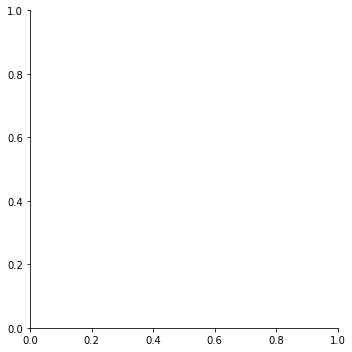

In [79]:
sns.catplot(x = "Veh Class", y = str('Comb_CO2'), data = epa)

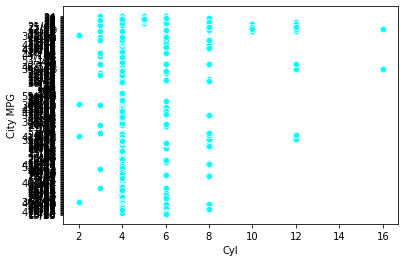

In [18]:
sns.scatterplot(x = "Cyl", y = "City MPG", color = "cyan", data = epa);

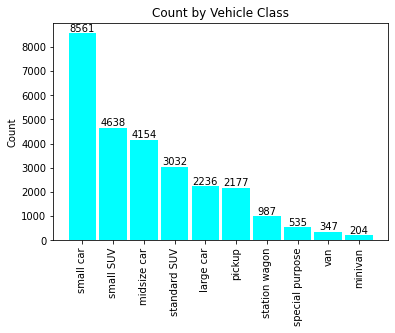

In [24]:
#Finding the count if Vehicle Class categories
veh_class_count = epa['Veh Class'].value_counts()
#print(veh_class_count)
x = np.arange(len(veh_class_count.index))
width = 0.9
fig, ax = plt.subplots()
bars = ax.bar(x - width/2, veh_class_count.values, width, color = 'cyan')
ax.set_ylabel('Count')
ax.set_title('Count by Vehicle Class')
ax.set_xticks(x - width/2, veh_class_count.index)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

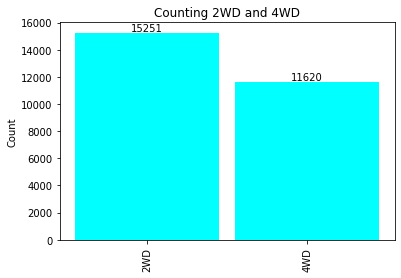

In [25]:
drive_count = epa['Drive'].value_counts()
x = np.arange(len(drive_count.index))
width = 0.9
fig, ax = plt.subplots()
bars = ax.bar(x - width/2, drive_count.values, width, color = 'cyan')
ax.set_ylabel('Count')
ax.set_title('Counting 2WD and 4WD')
ax.set_xticks(x - width/2, drive_count.index)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

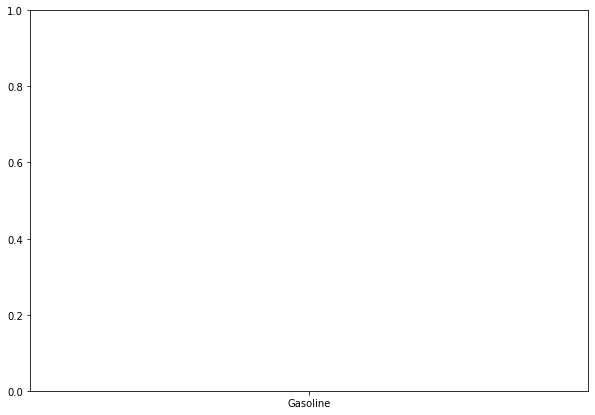

In [26]:
fig = plt.figure(figsize =(10, 7))
plt.bar(epa['Fuel'], epa['City MPG'], color = 'orange')
plt.show()

In [ ]:
sns.catplot((y = ))